# Netflix Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot
import warnings

warnings.filterwarnings("ignore")

### Import Dataset

In [7]:
# df = pd.read_csv('E:/Data_Analysis_Datasets/netflix_titles.csv')
df = pd.read_csv('C:/Users/91787/Desktop/PY YT/Data_Analysis_Project/netflix_analysis/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Show Rows and Columns

print(f"Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Rows: 8807 and Columns: 12


In [9]:
# Info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# Generate Description
# df.describe()

In [11]:
# Detect missing values.
df.isnull().sum() #this gives me the total number of null values in the columns of the dataset

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Return boolean Series denoting duplicate rows.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [13]:
except_duplicate = df.duplicated().sum()
except_duplicate # This is used to check the duplicates 

np.int64(0)

In [14]:
df = df.dropna(subset=['duration','rating'])  # Keep only the rows where 'duration' and 'rating' are both present.
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
# Detect missing values.
df.isnull().sum()

show_id            0
type               0
title              0
director        2631
cast             825
country          830
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
# Replace the NaN value with the meaningful name Than again check there is any

df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Listed')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Date Not Available')

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Each Column wise Analysis

In [17]:
# Count the type
print(df['type'].value_counts())

type
Movie      6126
TV Show    2674
Name: count, dtype: int64


In [18]:
# sns.countplot(data=df, x='type', palette='Set2')
# plt.title("Count of Movies vs TV Shows")
# plt.show()

fig = px.histogram(df, x='type', color='type', 
                   color_discrete_sequence=px.colors.qualitative.Set2, 
                   title="Count of Movies vs TV Shows")
fig.update_layout(showlegend=False)
fig.show()

In [19]:

fig = px.pie(
    df,
    names='type',
    color='type',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Count of Movies vs TV Shows'
)
fig.update_traces(textinfo='percent+label')  # Show percentage and label on each slice
# fig.update_layout(showlegend=True, xaxis_title="Actor", yaxis_title="Count")
fig.show()

In [20]:
# Top 10 Movies
# top10_movies = df[df['type'] == 'Movie'].sort_values(by='rating', ascending=True).head(10)
top10_movies = df[df['type'] == 'Movie'].head(10)
print(top10_movies['title'])

0                                  Dick Johnson Is Dead
6                      My Little Pony: A New Generation
7                                               Sankofa
9                                          The Starling
12                                         Je Suis Karl
13                     Confessions of an Invisible Girl
16    Europe's Most Dangerous Man: Otto Skorzeny in ...
18                                            Intrusion
22                                      Avvai Shanmughi
23         Go! Go! Cory Carson: Chrissy Takes the Wheel
Name: title, dtype: object


In [21]:
# Top 10 TV Show
top10_tvshows = df[df['type'] == 'TV Show'].head(10)
print(top10_tvshows['title'])

1                           Blood & Water
2                               Ganglands
3                   Jailbirds New Orleans
4                            Kota Factory
5                           Midnight Mass
8           The Great British Baking Show
10    Vendetta: Truth, Lies and The Mafia
11                       Bangkok Breaking
14        Crime Stories: India Detectives
15                      Dear White People
Name: title, dtype: object


In [56]:
total_directors = df['director'].value_counts().sort_values(ascending=False).head(10)

print(total_directors)
print(top_directors)

director
Not Available             2631
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Name: count, dtype: int64


In [59]:
# Drop 'Not Available' and select the next top 10
top_directors = top_directors.drop('Not Available').head(10)

top_directors.plot(kind='bar', color='#8dd3c7')
plt.xlabel("Director")
plt.ylabel("Count")
plt.title('Top 10 Directors on Netflix')
plt.xticks(rotation=90)
plt.show()

KeyError: "['Not Available'] not found in axis"

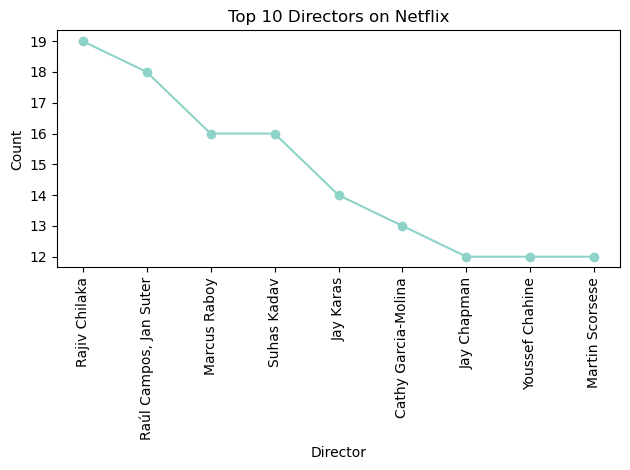

In [60]:
top_directors.plot(kind='line', color='#8dd3c7', marker='o')
plt.xlabel("Director")
plt.ylabel("Count")
plt.title('Top 10 Directors on Netflix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [61]:
# Extract most frequent actor names
# cast_data = df['cast'].dropna().str.split(',')
cast_data = df['cast'].dropna().str.split(',').explode().str.strip()

# Remove any entries where cast is 'Not Listed'
cast_data = cast_data[cast_data != 'Not Listed']

top_actors = cast_data.value_counts().head(10)

print(top_actors)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


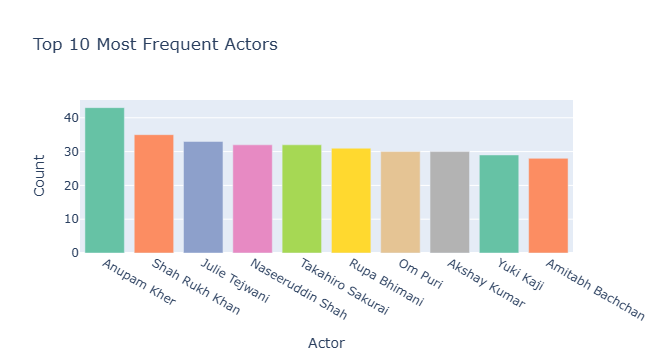

In [62]:
# top_actors.plot(kind="bar")

actor_counts_df = top_actors.reset_index() # Generate a new DataFrame or Series with the index reset.
actor_counts_df.columns = ['actor', 'count']

fig = px.bar(
    actor_counts_df,
    x='actor',
    y='count',
    color='actor',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Top 10 Most Frequent Actors'
)
fig.update_layout(showlegend=False, xaxis_title="Actor", yaxis_title="Count")
fig.show()

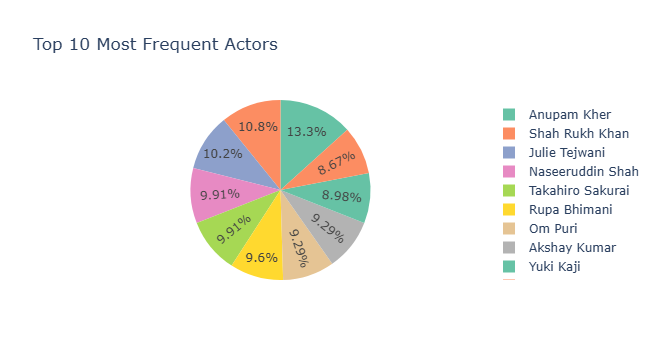

In [33]:

fig = px.pie(
    actor_counts_df,
    names='actor',
    values='count',
    color='actor',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Top 10 Most Frequent Actors'
)
fig.update_layout(showlegend=True, xaxis_title="Actor", yaxis_title="Count")
fig.show()

In [34]:
# Get the 10 least frequent actors ("flop" actors)

flop_actors = cast_data.value_counts().tail(10)

print(flop_actors)

cast
Umut Tanyolu           1
Murat Ercanlı          1
Emily Bauer            1
Michael Crouch         1
Gökhan Atalay          1
Payidar Tüfekçioglu    1
Baran Akbulut          1
Mehmet Çepiç           1
Seda Tosun             1
Mehmet Ali Tuncer      1
Name: count, dtype: int64


In [35]:
# Top 10 Production Country

top_countries = df['country'].value_counts().head(10)
top_countries

country
United States     2815
India              972
Unknown            830
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

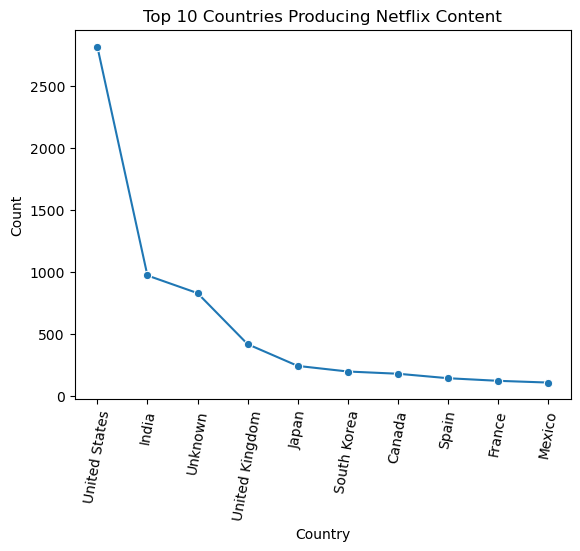

In [36]:
sns.lineplot(x=top_countries.index, y=top_countries.values, palette="viridis", marker='o')
plt.xlabel('Country')
plt.ylabel("Count")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xticks(rotation=80)


In [37]:
# Lowest 10 Production Country

lowest_countries = df['country'].value_counts().tail(10)
lowest_countries

country
Germany, United States, United Kingdom, Canada                  1
Canada, India, Thailand, United States, United Arab Emirates    1
United States, East Germany, West Germany                       1
France, Netherlands, South Africa, Finland                      1
Egypt, Austria, United States                                   1
Russia, Spain                                                   1
Croatia, Slovenia, Serbia, Montenegro                           1
Japan, Canada                                                   1
United States, France, South Korea, Indonesia                   1
Canada, Mexico, Germany, South Africa                           1
Name: count, dtype: int64

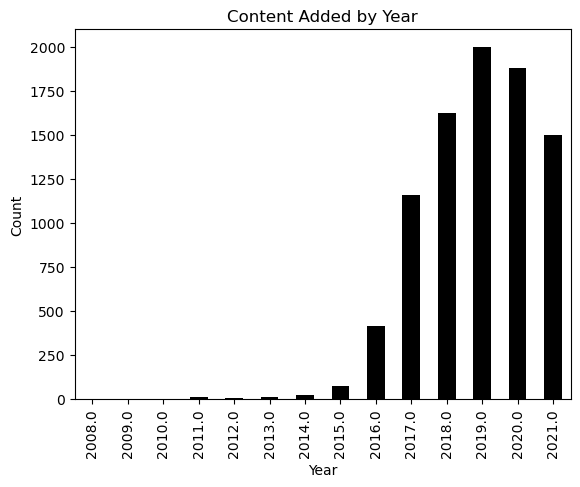

In [38]:
# When Added to Netflix
# df['date_added'].dtype 

# Now safely convert to datetime; errors='coerce' ensures any non-date goes to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['year_added'].value_counts().sort_index().plot(kind='bar', color="black", title='Content Added by Year')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [39]:
release_yr = df['release_year'].value_counts().head(5)
print(release_yr)

release_year
2018    1147
2017    1030
2019    1030
2020     953
2016     902
Name: count, dtype: int64


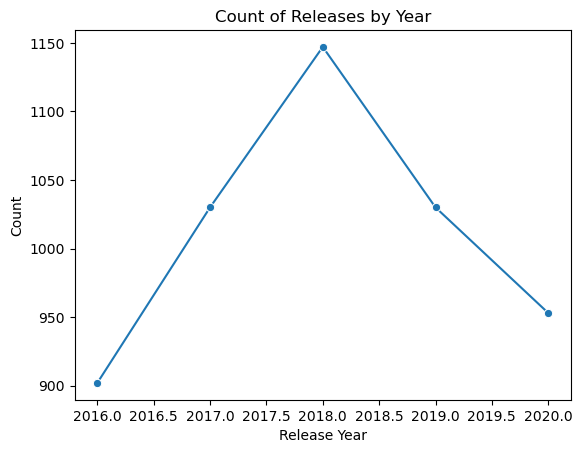

In [40]:
sns.lineplot(x=release_yr.index, y=release_yr.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Releases by Year')
plt.show()

# df['release_year'].value_counts().sort_index().plot(kind='line', title='Content by Release Year', figsize=(12, 5))
# plt.xlabel("Year")
# plt.ylabel("Count")
# plt.grid()
# plt.show()


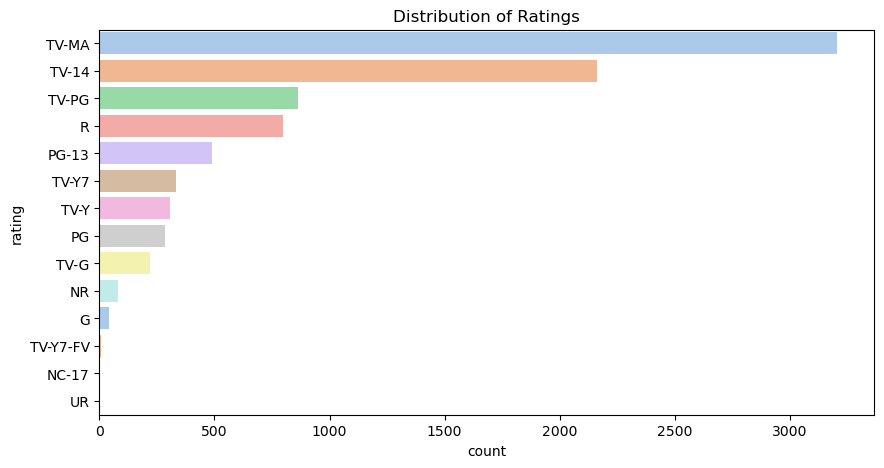

In [41]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='pastel')
plt.title("Distribution of Ratings")
plt.show()

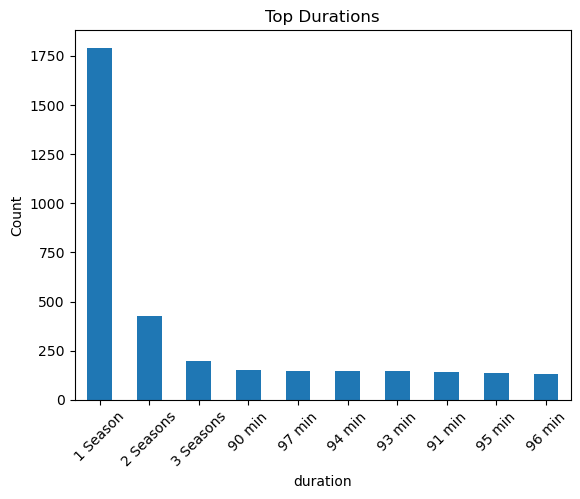

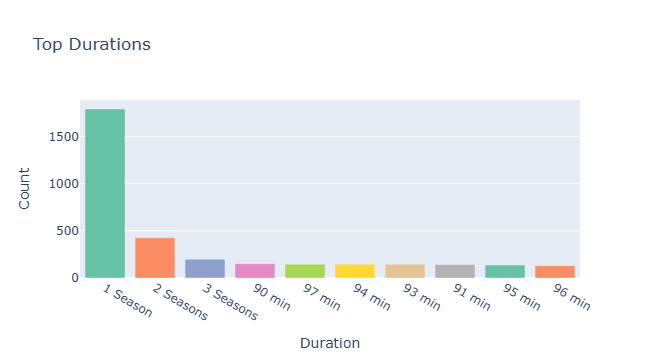

In [42]:
df['duration'].value_counts().head(10).plot(kind='bar', title='Top Durations')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Compute value counts and reset the index for plotting
duration_counts = df['duration'].value_counts().head(10).reset_index()
duration_counts.columns = ['duration', 'count']

fig = px.bar(
    duration_counts,
    x='duration',
    y='count',
    color='duration',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Top Durations'
)
fig.update_layout(showlegend=False, xaxis_title="Duration", yaxis_title="Count")
fig.show()

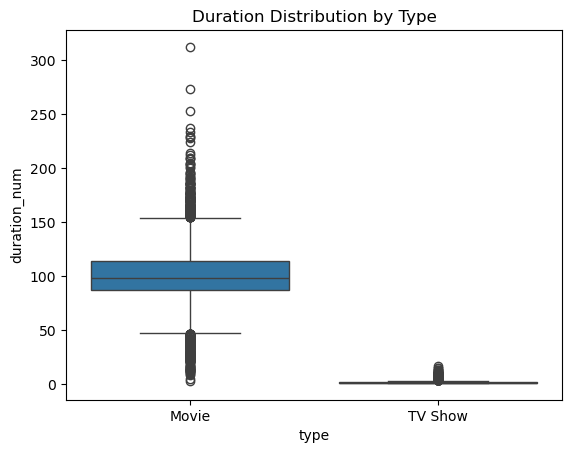

In [43]:
# Split duration into numbers and units
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s+(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

sns.boxplot(x='type', y='duration_num', data=df)
plt.title("Duration Distribution by Type")
plt.show()

In [44]:
# Split genres and get top ones
genres = df['listed_in'].str.split(',')

flat_genres = pd.Series([genres for sublist in genres.dropna() for genres in sublist ])
top_genres = flat_genres.value_counts().head(10)
top_genres

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

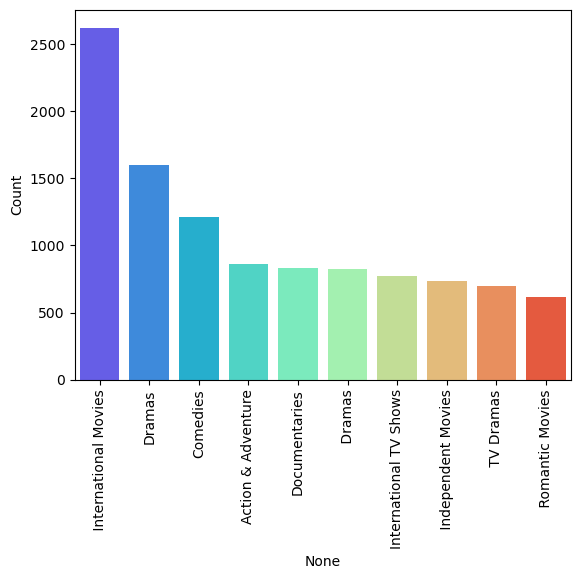

In [45]:
# top_genres.plot(kind='bar', title='Top 10 Genres on Netflix', color='tomato')

sns.barplot(x=top_genres.index, y=top_genres.values, palette='rainbow')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Length of Description')

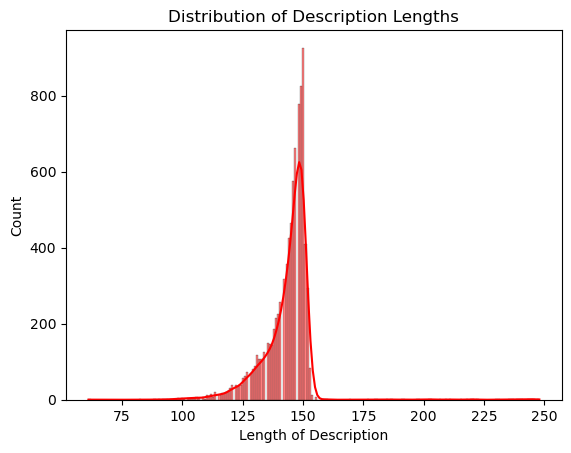

In [46]:
# Check for missing and word count
df['description'].isnull().sum()
df['desc_len'] = df['description'].str.len()
# df

sns.histplot(df['desc_len'],kde=True,color='Red')
plt.title('Distribution of Description Lengths')
plt.xlabel("Length of Description")


In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_unit,desc_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,min,152
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,Seasons,147
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,Season,146
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Listed,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,Season,147
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,Seasons,152
